In [132]:
import pandas as pd
df = pd.read_csv('./Sunspots.csv').iloc[:,1:]
df.head(3)

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7


In [130]:
import matplotlib.pyplot as plt
# dates = df.loc[:,'Date']
# values = df.iloc[:,1]
# plt.plot(dates, values)
# plt.show()

In [133]:
df['Date'] = pd.to_datetime(df['Date']).astype("int64")/10**9
start = -int(df['Date'][0])
df['Date'] = df['Date'].astype("int64").copy().add(start)
print(df.dtypes)
print(df.shape)



from sklearn.model_selection import train_test_split
split = int(df.shape[0]*.75)
train, test = df.iloc[:split].copy(), df.iloc[split:].copy()

x_train, y_train = train['Date'], train.iloc[:, 1]
x_test, y_test = test['Date'], test.iloc[:, 1]


print(x_train)

Date                                   int64
Monthly Mean Total Sunspot Number    float64
dtype: object
(3265, 2)
0                0
1          2419200
2          5097600
3          7689600
4         10368000
           ...    
2443    6424358400
2444    6426950400
2445    6429628800
2446    6432220800
2447    6434899200
Name: Date, Length: 2448, dtype: int64


In [139]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=500, learning_rate=0.01)
model.fit(x_train, y_train, eval_set=[(x_train, y_train),(x_test, y_test)], eval_metric='mae')

[0]	validation_0-mae:4635162.00000	validation_1-mae:4627495.00000
[1]	validation_0-mae:9247177.00000	validation_1-mae:9231937.00000
[2]	validation_0-mae:13836062.00000	validation_1-mae:13813363.00000
[3]	validation_0-mae:18401996.00000	validation_1-mae:18371868.00000
[4]	validation_0-mae:22945210.00000	validation_1-mae:22907604.00000
[5]	validation_0-mae:27465400.00000	validation_1-mae:27420652.00000
[6]	validation_0-mae:31963038.00000	validation_1-mae:31911124.00000
[7]	validation_0-mae:36438084.00000	validation_1-mae:36379136.00000
[8]	validation_0-mae:40890832.00000	validation_1-mae:40824828.00000
[9]	validation_0-mae:45321400.00000	validation_1-mae:45248352.00000
[10]	validation_0-mae:49729448.00000	validation_1-mae:49649648.00000
[11]	validation_0-mae:54115304.00000	validation_1-mae:54028996.00000
[12]	validation_0-mae:58479736.00000	validation_1-mae:58386420.00000
[13]	validation_0-mae:62821952.00000	validation_1-mae:62722052.00000
[14]	validation_0-mae:67142016.00000	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

[1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09
 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09
 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09
 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09
 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09
 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09
 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09
 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09
 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09
 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09
 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09
 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09
 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09
 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09 1.5788179e+09
 1.578

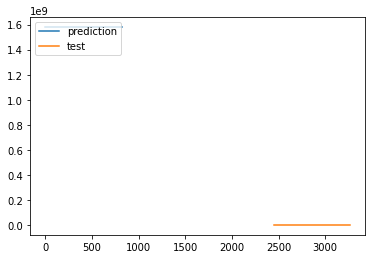

In [140]:
prediction = model.predict(x_test)
print(prediction)
plt.plot(prediction, label="prediction")
plt.plot(y_test, label="test")
plt.legend(loc='upper left')
plt.show()